# Arboles de Decisión

Es un modelo predicción y aprendisaje automatico basado en una seria de posbiles resultados ocurridos por la toma de decisiones.
Los árboles de decisión se construyen a partir de un conjunto de datos de entrenamiento que contiene variables predictoras (características) y una variable objetivo (clase o valor a predecir)

El algoritmo comienza seleccionando la característica que mejor divide los datos en grupos más puros o homogéneos con respecto a la variable objetivo. Esto se hace midiendo la impureza de los grupos, por ejemplo, usando el índice de Gini o la entropía.

Una vez seleccionada la mejor característica de división, el algoritmo crea un nodo raíz y divide los datos en subgrupos según los valores de esa característica.

El proceso se repite recursivamente para cada subgrupo, seleccionando la siguiente característica que mejor divide esos datos, hasta que se llega a nodos terminales (hojas) que representan las predicciones finales.

Para hacer una predicción con el árbol, se recorre el árbol desde el nodo raíz hasta una hoja, siguiendo las condiciones en cada nodo interno hasta llegar a la clase o valor predicho.

Los árboles de decisión son fáciles de interpretar y explicar, pero pueden volverse muy complejos si se crean árboles demasiado profundos.

Este modelo puede ser representado por un árbol que contiene:
1. Un conjunto de condicionales (Nodos sin hojas)
2. Un conjunto de clases (Hojas)
3. Un conjunto de características (x)

In [ ]:
# Instalar librerías necesarias (Solo ejecutar si no están instaladas)
from IPython.utils import io
import tqdm.notebook

total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
        # Instalar rdkit
        !pip -q install rdkit.pypi==2021.9.4
        pbar.update(20)
        # Instalar Pillow
        !pip -q install Pillow
        pbar.update(40)
        # Instalar molplotly
        !pip install molplotly
        pbar.update(60)
        # Instalar jupyter-dash
        !pip install jupyter-dash
        pbar.update(80)
        # Instalar el diseño de aplicación dash
        !pip install dash-bootstrap-components
        pbar.update(100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# Importar librerías
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set de Datos

Partimnos de un set de datos que contiene 206 compuestos geroprotectores obtenidos de geroprotectors.org y 199 compuestos con etiqueta de toxicos obtenidos de ChEMBL por medio de API.
Para el modelo de Machine Learning se usara de la siguiente manera, los datos fueron binados y ordenados en datos de prueba y entrenamiento.

0= compuestos NO geroprotectores (prueba)

1= compuestos geroprotectores con pruebas experimentales (test)

In [ ]:
# Leer bases de datos
datos = "/content/drive/MyDrive/INGER/ETAPA 2024/Version Final/0. Data Set/Concatenadas.csv"
datos = pd.read_csv(datos)

In [ ]:
# Agregar una columna de índices
datos['Index'] = datos.index

In [ ]:
# Información del dataset
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       405 non-null    object 
 1   Total Molweight            405 non-null    float64
 2   Monoisotopic Mass          405 non-null    float64
 3   cLogP                      405 non-null    float64
 4   cLogS                      405 non-null    float64
 5   H-Acceptors                405 non-null    int64  
 6   H-Donors                   405 non-null    int64  
 7   Total Surface Area         405 non-null    float64
 8   Relative PSA               405 non-null    float64
 9   Polar Surface Area         405 non-null    float64
 10  Druglikeness               405 non-null    float64
 11  Shape Index                405 non-null    float64
 12  Molecular Flexibility      405 non-null    float64
 13  Molecular Complexity       405 non-null    float64

In [ ]:
# Separar las las columnas de las variables predictorias (X) de la columna que contiene la variable a predecir (Y)
#X = datos.iloc[:, 1:20]
#y = datos.iloc[:, 44]

In [ ]:
# Separar las las columnas de las variables predictorias (X) de la columna que contiene la variable a predecir (Y)
# PODEMOS UTILIZAR UNICAMENTE COLUMNAS (DESCRIPTORES) DE INTERES PARA ENTRENAR EL MODELO Y NO CAER EN SOBREAJUSTE.
columnas_interes = [1, 3, 5, 6, 7, 8, 20]
X = datos.iloc[:, columnas_interes]
y = datos.iloc[:, 44]

In [ ]:
# Separar datos en conjuntos de entrenamiento y prueba

#indicamos que se partan los datos en un 80% para la entrenamiento y 20% para prueba,
#el valor de random_state=42 nos indica que el algoritmo utilizará los mismos datos de entrenamiento y prueba lo que nos dara reproducibilidad

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


#Creacion del modelo de Arbol de decision

Árbol de Decisión Binario: Un árbol de decisión binario es una estructura de datos utilizada en la toma de decisiones y en el aprendizaje automático. Se caracteriza por su forma jerárquica, donde cada nodo representa una condición o decisión relacionada con una variable, y cada rama indica el resultado de esa decisión, dividiendo así el espacio de posibles resultados en dos partes.
Los árboles de decisión son fundamentales en la creación de modelos predictivos, donde se busca agrupar observaciones con características similares para predecir una variable de respuesta.

In [ ]:
# Creación del modelo de Árbol de Decisión Binario
arbol = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)


In [ ]:
# Entrenar el modelo
arbol_geros = arbol.fit(X_train, y_train)


In [ ]:
# Predecir la respuesta en base a las etiquetas para todos los datos
y_pred_all = arbol_geros.predict(X)


# Resultados

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

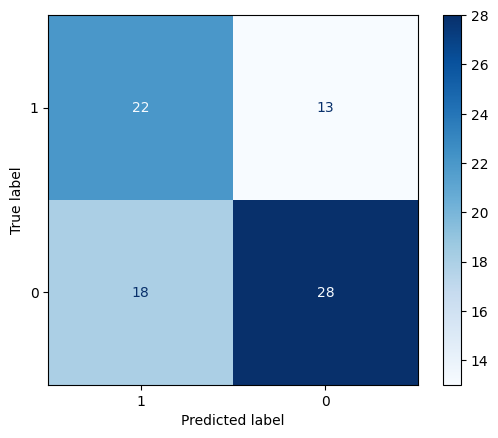

In [ ]:
# Generar y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, arbol_geros.predict(X_test))
class_names = y_test.unique()
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
tp = 22
fp = 18
fn = 13
tn = 28


### Accurucy (precisión)

Es el porcentaje de predicciones correctas sobre el total de predicciones realizadas.

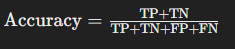

donde:

TP: Verdaderos positivos

TN: Verdaderos negativos

FP: Falsos positivos

FN: Falsos negativos

In [ ]:
# Mostrar la precisión del modelo en el conjunto de prueba
from sklearn.metrics import accuracy_score
accuracy = (tp + tn) / (tp + fp + fn + tn)
#accuracy = accuracy_score(y_test, arbol_geros.predict(X_test))
print("Accuracy:", accuracy)


Accuracy: 0.6172839506172839


### Especificidad

 Es la capacidad del modelo para identificar correctamente las muestras negativas.

 También se conoce como tasa de verdaderos negativos.

 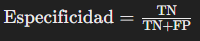

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the specificity score
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.6829268292682927


In [ ]:
# Crear un nuevo dataframe con todos los resultados
resultados_arbol = datos.copy()
resultados_arbol['Prediction'] = y_pred_all


In [ ]:
resultados_arbol

,Name,Total Molweight,Monoisotopic Mass,cLogP,cLogS,H-Acceptors,H-Donors,Total Surface Area,Relative PSA,Polar Surface Area,...,Alkyl-Amines,Aromatic Amines,Aromatic Nitrogens,Basic Nitrogens,Acidic Oxygens,Geroprotectors,DataSet,Smile,Index,Prediction
0,"(R,R)-Cis-Diethyl Tetrahydro-2,8-Chrysenediol",320.431,320.177630,4.8318,-4.116,2,2,246.20,0.106420,40.46,...,0,0,0,0,0,1,Geroprotectors,CC[C@@H]1CC2=C(C=CC(=C2)O)C3=C1C4=C(C[C@H]3CC)...,0,0
1,"1,2,3,4,6-Penta-O-Galloyl-B-D-Glucose",940.679,940.118190,1.8357,-3.209,26,15,619.06,0.519660,444.18,...,0,0,0,0,0,1,Geroprotectors,Oc1cc(cc(O)c1O)C(=O)OC[C@H]1O[C@@H](OC(=O)c2cc...,1,1
2,10-Hydroxy-2-Decenoic Acid,186.250,186.125595,2.1572,-1.884,3,2,166.77,0.235290,57.53,...,0,0,0,0,1,1,Geroprotectors,C(CCC/C=C/C(=O)O)CCCO,2,1
3,1400W,177.250,177.126597,-0.1475,-1.874,3,2,153.05,0.274750,64.40,...,1,0,0,2,0,1,Geroprotectors,CC(=NCC1=CC=CC(=C1)CN)N,3,1
4,17-A-Estradiol,272.387,272.177630,3.8766,-4.020,2,2,200.69,0.130550,40.46,...,0,0,0,0,0,1,Geroprotectors,[H][C@]12CC[C@]3(C)[C@H](O)CC[C@@]3([H])[C@]1(...,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,Tolcapone,273.243,273.063724,1.5205,-3.928,6,2,199.40,0.349350,103.35,...,0,0,0,0,0,0,NoGeroprotectors,CC1=CC=C(C=C1)C(=O)C2=CC(=C(C(=C2)O)O)[N+](=O)...,400,0
401,Acridine Orange,265.359,265.157897,3.0853,-3.895,3,0,210.86,0.085697,19.37,...,0,2,1,0,0,0,NoGeroprotectors,CN(C)C1=CC2=C(C=C1)C=C3C=CC(=CC3=N2)N(C)C,401,1
402,Aflatoxins,312.276,312.063390,1.6346,-3.266,6,0,208.96,0.316230,71.06,...,0,0,0,0,0,0,NoGeroprotectors,COC1=C2C3=C(C(=O)CC3)C(=O)OC2=C4C5C=COC5OC4=C1,402,0
403,Diethylstilbestrol,268.355,268.146330,4.5248,-3.158,2,2,220.68,0.118720,40.46,...,0,0,0,0,0,0,NoGeroprotectors,CCC(=C(CC)C1=CC=C(C=C1)O)C2=CC=C(C=C2)O,403,1


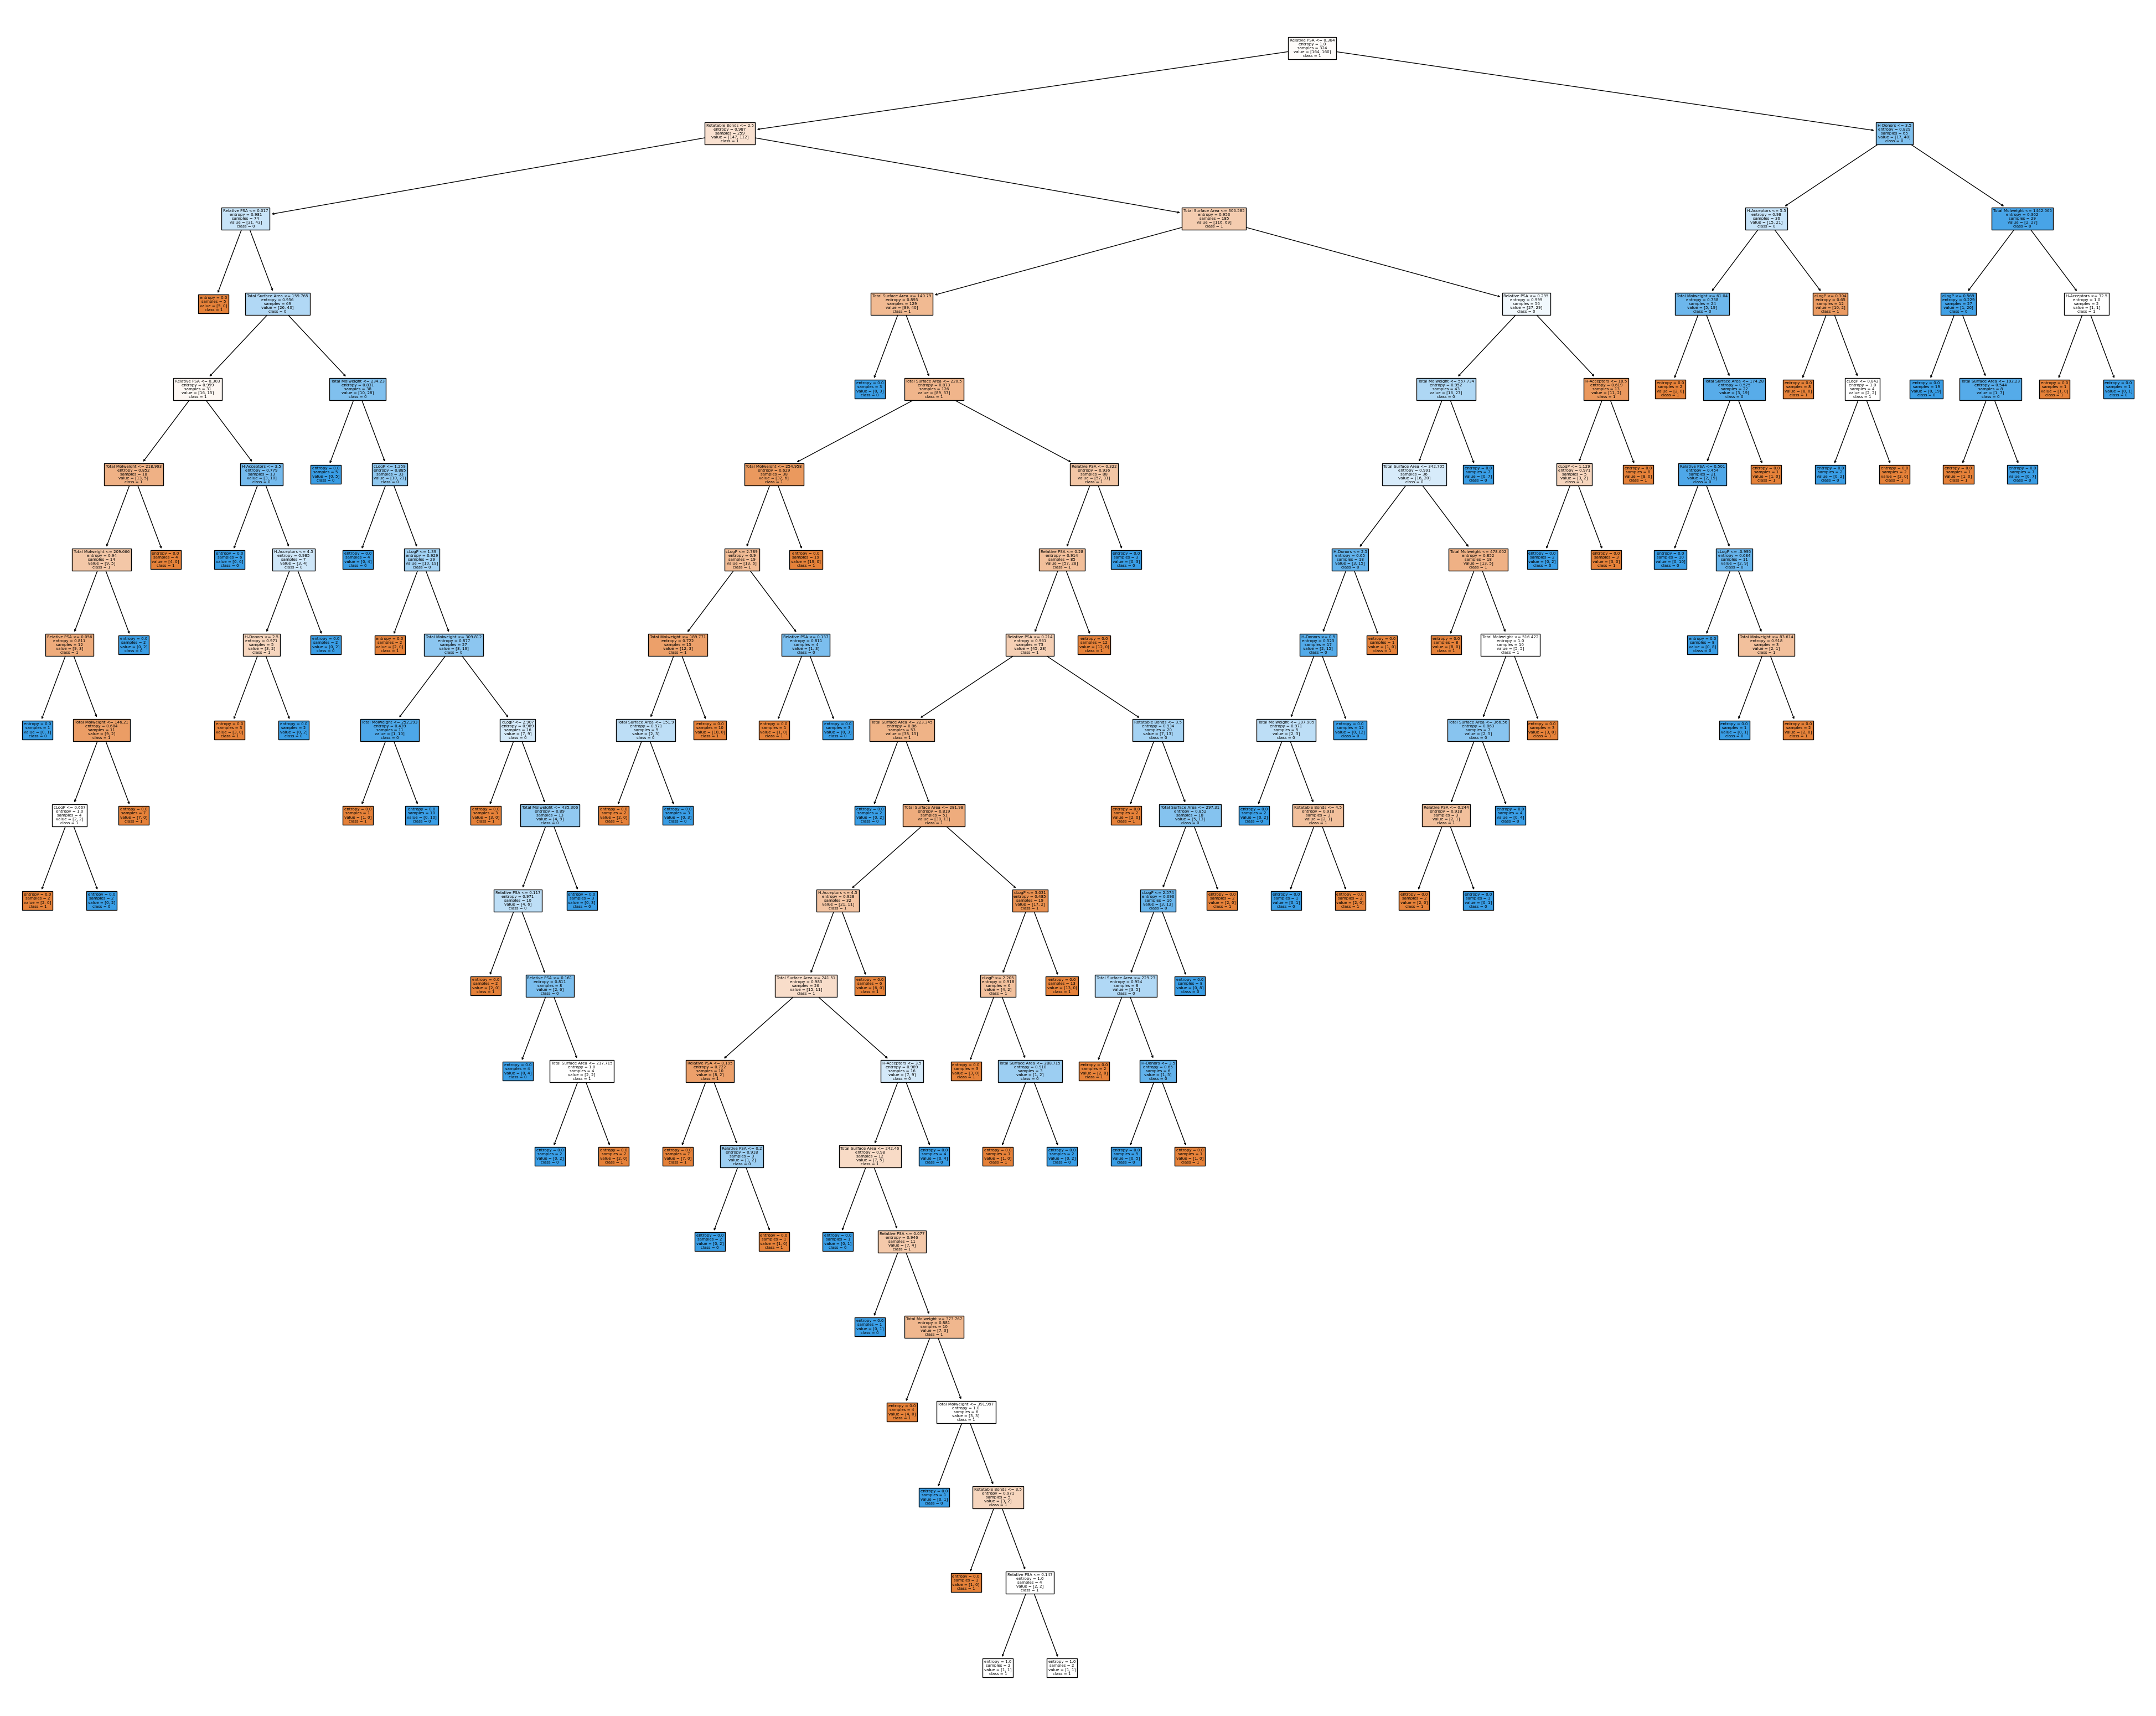

In [ ]:
# Visualizar el árbol de decisión
fig = plt.figure(figsize=(50, 40))
ax = fig.add_subplot(111)
class_names = list(map(str, y.unique()))
tree.plot_tree(arbol_geros, feature_names=list(X.columns), class_names=class_names, filled=True, ax=ax)
plt.show()

In [ ]:
# Guardar los resultados en un archivo CSV
#resultados_arbol.to_csv('resultados_arbol.csv', index=False)

#Predicciones

De los datos obtenidos en coconut data base.

COCONUT es una plataforma dedicada a recopilar y proporcionar información sobre propiedades, aplicaciones, beneficios para la salud de productos naturales. Esta base de datos cuenta con mas de 400 mil compuestos.

In [ ]:
# Cargar la base de datos COCONUT
coconut_data = pd.read_csv("/content/drive/MyDrive/INGER/ETAPA 2024/DATA /COCONUT_DesMol.csv")

In [ ]:
coconut_data.dropna(inplace=True)

In [ ]:
coconut_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407270 entries, 0 to 407269
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Structure [idcode]         407252 non-null  object 
 1   Molecule Name              407252 non-null  object 
 2   coconut_id                 407270 non-null  object 
 3   SMILES                     407270 non-null  object 
 4   name                       364597 non-null  object 
 5   Total Molweight            407206 non-null  float64
 6   Molweight                  407206 non-null  float64
 7   Monoisotopic Mass          407206 non-null  float64
 8   cLogP                      407206 non-null  float64
 9   cLogS                      407206 non-null  float64
 10  H-Acceptors                407206 non-null  float64
 11  H-Donors                   407206 non-null  float64
 12  Total Surface Area         407206 non-null  float64
 13  Relative PSA               40

In [ ]:
# Preprocesar los datos de COCONUT
# Asegúrate de que coconut_data tenga las mismas columnas que usaste para entrenar el modelo
coconut_features = coconut_data.iloc[:, [5, 8, 10, 11, 12, 13, 25]]

In [ ]:
# Utilizar el modelo para hacer predicciones
coconut_predictions = arbol_geros.predict(coconut_features)

In [ ]:
# Añadir las predicciones a tu DataFrame de COCONUT
coconut_data['Prediccion'] = coconut_predictions

In [ ]:
coconut_data

,Structure [idcode],Molecule Name,coconut_id,SMILES,name,Total Molweight,Molweight,Monoisotopic Mass,cLogP,cLogS,...,Non-Aromatic Hetero-Rings,Hetero-Aromatic Rings,Amides,Amines,Alkyl-Amines,Aromatic Amines,Aromatic Nitrogens,Basic Nitrogens,Acidic Oxygens,Prediccion
0,ffk@p@@HdEM\bbTTTtbrbtMNLEkw`qRuUUUUTsUP@Oxaq`...,Compound 1,CNP0000001,O=C1OC2C(C(=C)C)CC1C3(O)CC4OC54C(=O)OC[CH]253C,Picrotoxinin,308.329,308.329,308.125990,-0.1819,-2.231,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,ek_TOH@DEVNCGHlbekhTZY]SP@cHdhhmhhheLiddiEEEhc...,Compound 2,CNP0000002,O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(O...,5-{6-[(acetyloxy)methyl]-3-hydroxy-4-[(5-hydro...,660.648,660.648,660.183643,-2.4498,-2.574,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,ecTpE@@@DIOLk`\VQ\bbTTTTTTRrbnvbTRtRRabwAfbPUQ...,Compound 3,CNP0000003,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C(OC)=CC=C(OC)C6C...,"20,30-dihydroxy-5,9,12,25-tetramethoxy-27-meth...",598.602,598.602,598.183900,4.1740,-7.354,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,ei_PI@@@DIOLk`\^\bbTTTTTTRrbnvbTRtRRLxLtRBjJZv...,Compound 4,CNP0000004,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,"9,20,30-trihydroxy-5,25-dimethoxy-27-methyl-22...",554.549,554.549,554.157685,3.9683,-7.022,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,enUPF@@@DMBod\bbTTRTTVRVbffbjRvfdT|lbRr^AZ`hJh...,Compound 5,CNP0000005,O=C(OC1CC(C)(CCOC(=O)C(C)(C)C)C2CC(C)(C)CC2C1O...,"5-(benzoyloxy)-7-{2-[(2,2-dimethylpropanoyl)ox...",534.690,534.690,534.298140,7.2444,-6.642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407216,em`XB@@D`NAKLbbbTTlTTebrrRXdDT\BrJjZfVZfZjjjZ`...,Compound 407217,CNP0478745,O=C1OC2(O)C3=C1C(=O)CCC3(C)C4(C=5NC=6C=CC=CC6C...,penerpene c,363.412,363.412,363.147059,2.4575,-4.305,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
407224,gbKGaX@@DE@qTzVoPCQXJWGfJdrMNbv{HheEEMMCeDheLh...,Compound 407225,CNP0478753,O=C(O)C1NC(=O)C(C)C(C=CC(=CC(C)C(OC)CC=2C=CC=C...,mc-(h2)yg,948.080,948.080,947.464038,0.8406,-4.441,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0
407226,ff}`p@C@PpVRyEDeEhdUEDhbTSUjZjjBAb@@@ !BR}o_Cb...,Compound 407227,CNP0478755,O=C1OC(O)(C(OC)=C1)C(C)CNC=2C=CC=CC2C(=O)O,ochraspergillic acid a,307.301,307.301,307.105589,0.4398,-2.300,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1
407234,glJdAd@@@B@QxzWGgqdJ]Ajp{\^@pTNQQJQQQIJJHqIJJI...,Compound 407235,CNP0478763,O=C(OC1OC(CO)C(O)C(OC2OC(CO)C(O)C(O)C2O)C1OC3O...,desacyl perennisoside ii,959.128,959.128,958.513735,-0.2991,-4.829,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
# Guardar los resultados en un archivo CSV
#coconut_data.to_csv('coconut_arbol_prediccion.csv', index=False)

In [ ]:
# Analizar los resultados
# Contar cuántos compuestos se predicen como activos o inactivos
print(coconut_data['Prediccion'].value_counts())


Prediccion
1    189799
0    174751
Name: count, dtype: int64


In [ ]:
# Filtrar los compuestos predichos como activos
compuestos_activos = coconut_data[coconut_data['Prediccion'] == 1]

In [ ]:
# Mostrar los primeros compuestos predichos como activos
compuestos_activos.head(10)

,Structure [idcode],Molecule Name,coconut_id,SMILES,name,Total Molweight,Molweight,Monoisotopic Mass,cLogP,cLogS,...,Non-Aromatic Hetero-Rings,Hetero-Aromatic Rings,Amides,Amines,Alkyl-Amines,Aromatic Amines,Aromatic Nitrogens,Basic Nitrogens,Acidic Oxygens,Prediccion
0,ffk@p@@HdEM\bbTTTtbrbtMNLEkw`qRuUUUUTsUP@Oxaq`...,Compound 1,CNP0000001,O=C1OC2C(C(=C)C)CC1C3(O)CC4OC54C(=O)OC[CH]253C,Picrotoxinin,308.329,308.329,308.125990,-0.1819,-2.231,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,ek_TOH@DEVNCGHlbekhTZY]SP@cHdhhmhhheLiddiEEEhc...,Compound 2,CNP0000002,O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(O...,5-{6-[(acetyloxy)methyl]-3-hydroxy-4-[(5-hydro...,660.648,660.648,660.183643,-2.4498,-2.574,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,ecTpE@@@DIOLk`\VQ\bbTTTTTTRrbnvbTRtRRabwAfbPUQ...,Compound 3,CNP0000003,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C(OC)=CC=C(OC)C6C...,"20,30-dihydroxy-5,9,12,25-tetramethoxy-27-meth...",598.602,598.602,598.183900,4.1740,-7.354,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,ei_PI@@@DIOLk`\^\bbTTTTTTRrbnvbTRtRRLxLtRBjJZv...,Compound 4,CNP0000004,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,"9,20,30-trihydroxy-5,25-dimethoxy-27-methyl-22...",554.549,554.549,554.157685,3.9683,-7.022,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,eaWPI@@@DIOLk`\V\bbTTTTTTRrbnvbTRtVVgAfbPUQSVq...,Compound 6,CNP0000006,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,"5,9,20,30-tetrahydroxy-25-methoxy-27-methyl-22...",540.523,540.523,540.142035,3.6926,-6.708,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,f`qAP@@HeYvQQJQJJHpgM^Zjjjjh@@ !BvuR_FXz@_Xa~@...,Compound 7,CNP0000007,O=C1OC(C)C(O)C12C(O)C(O)CCC2C,"4,6,7-trihydroxy-3,10-dimethyl-2-oxaspiro[4.5]...",230.259,230.259,230.115425,-0.6489,-1.547,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,fe{@p@@Hyyh|bbtTTRRTTtMRdcV\uUUUSUUST@@ !BuwwW...,Compound 9,CNP0000009,O=C(OCCC1(C)CC(OC(=O)C)C(OC(=O)C)C2CC(C)(C)CC21)C,"2-[6,7-bis(acetyloxy)-2,2,4-trimethyl-octahydr...",368.468,368.468,368.219890,3.1183,-3.695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11,en[PI@@@ECOEcghR\bbbbbbbReJaTRbbtvVbxDtB\RrjFf...,Compound 12,CNP0000012,O=C1C=2C=CC=C(O)C2C(=O)C3=C(O)C=C4C(=C13)C5C=C...,"5,9,21,24-tetrahydroxy-26-methylheptacyclo[15....",522.464,522.464,522.095085,3.3413,-7.019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13,fak@R@BL|DEYdTTTRbRbttqVyISf}`bHjjXH@b@j@@ !B_...,Compound 14,CNP0000014,O=C(OC=1C(I)=C2OC(C=3C=CC=CC3)CCC2=C(OC)C1C)C,"8-iodo-5-methoxy-6-methyl-2-phenyl-3,4-dihydro...",438.256,438.256,438.032808,4.4413,-5.025,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
14,fns@R@BL]xEYdTTTRbtVbfJwIJmUlDQEULD@Q@U@@ !B_c...,Compound 15,CNP0000015,O=C(OC=1C=C(OC)C2=C(OC(C=3C=CC=CC3)CC2)C1I)C,"8-iodo-5-methoxy-2-phenyl-3,4-dihydro-2H-1-ben...",424.229,424.229,424.017158,4.0974,-4.681,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Curva ROC del modelo

La curva ROC (Receiver Operating Characteristic) es una herramienta gráfica para evaluar el rendimiento de un modelo de clasificación binaria. Muestra la relación entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos (1 - especificidad) a medida que varía el umbral de decisión del clasificador.

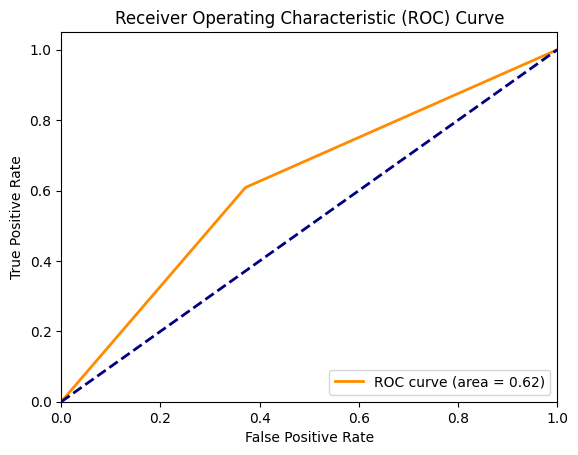

AUC: 0.62


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = arbol_geros.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Imprimir el AUC
print('AUC: %.2f' % roc_auc)